In [3]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

# Save the model to a file
model.save('mnist_model.h5')


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2976 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1448 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1097 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0890 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0763 - accuracy: 0.9759


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 53ms/step


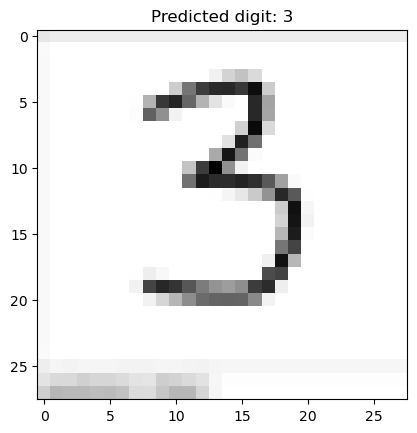

In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tkinter as tk
from tkinter import filedialog

# Load the saved model
model = load_model('mnist_model.h5')

# Function to open the file dialog
def open_image():
    file_path = filedialog.askopenfilename()
    upload_and_detect(file_path)

# Function to upload and display the image
def upload_and_detect(file_path):
    img = Image.open(file_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array.reshape(1, 28, 28, 1)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    digit = np.argmax(prediction)
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted digit: {digit}')
    plt.show()

# Create the main application window
root = tk.Tk()
root.title('Handwritten Digit Recognition')

# Add a button to open the file dialog
button = tk.Button(root, text='Open Image', command=open_image)
button.pack()

# Run the application
root.mainloop()
